### 1. Erosion
Erosion removes pixels on object boundaries. For binary images, it shrinks the white areas (foreground) and `enlarges the black areas (background)`. It’s like peeling off a layer from the outer boundary.

Use case: Often used to remove small white noise in images.

How it works: Erosion takes a small shape called a structuring element (like a square or circle), slides it across the image, and replaces each pixel with the minimum value within the structuring element area.

### 2. Dilation
Dilation is the opposite of erosion. It adds pixels to object boundaries. For binary images, it `expands white areas (foreground)` and reduces black areas (background).

Use case: Often used to fill small holes in an image.

How it works: Similar to erosion, but it replaces each pixel with the maximum value within the structuring element.

In [ ]:
!pip install opencv-python scikit-image

## Erosion & Dilation using OpenCV

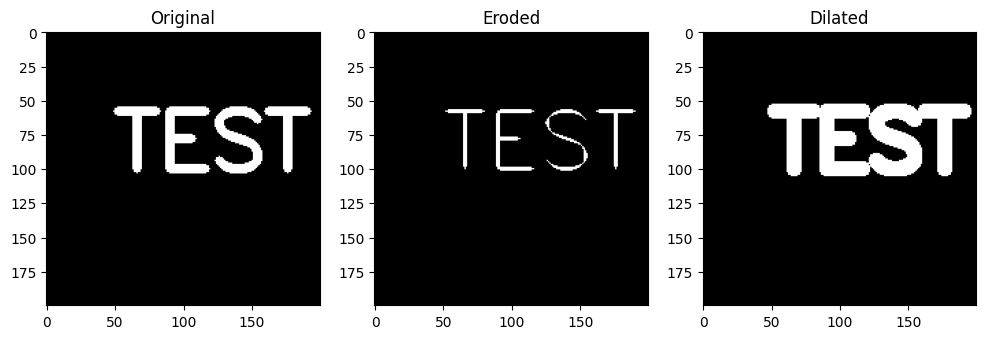

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load a sample binary image (create a simple one with text if you don't have an image)
# image_file = 'fingerprint.jpg'
# image = imread(image_file)  # this is the array representation of the input image
image = np.zeros((200, 200), dtype=np.uint8)
cv2.putText(image, "TEST", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (255), 5)

# Display the original image
plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

# Define a 5x5 square structuring element
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
eroded_image = cv2.erode(image, kernel, iterations=1)

# Apply dilation
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Display the results
plt.subplot(1, 3, 2)
plt.title("Eroded")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dilated")
plt.imshow(dilated_image, cmap='gray')
plt.show()


## Opening & Closing

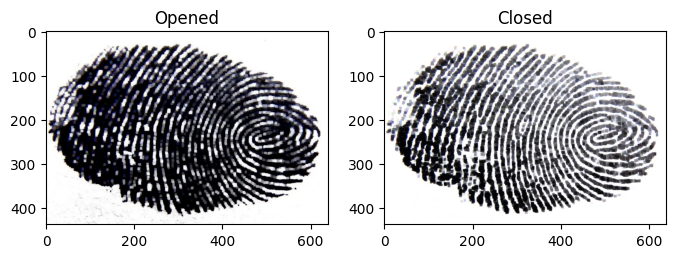

In [ ]:
# Apply Opening
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Apply Closing
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Opened")
plt.imshow(opened_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closed")
plt.imshow(closed_image, cmap='gray')
plt.show()

## Erosion & Dilation (Raw Implementation)

In [13]:
import numpy as np

# Create a simple binary image
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Define a 3x3 structuring element (all ones)
kernel = np.ones((3, 3), dtype=np.uint8)

def erode(img, kernel):
    # Get dimensions of the image and kernel
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    
    # Pad the original image to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    # Prepare the output image
    eroded_img = np.zeros_like(img)
    
    # Apply erosion
    for i in range(img_h):
        for j in range(img_w):
            # Extract the neighborhood
            region = padded_img[i:i+k_h, j:j+k_w]
            # Perform erosion (check if all values in region match the kernel)
            if np.all(region == kernel):
                eroded_img[i, j] = 1
            else:
                eroded_img[i, j] = 0
    return eroded_img

def dilate(img, kernel):
    # Get dimensions of the image and kernel
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    
    # Pad the original image to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    # Prepare the output image
    dilated_img = np.zeros_like(img)
    
    # Apply dilation
    for i in range(img_h):
        for j in range(img_w):
            # Extract the neighborhood
            region = padded_img[i:i+k_h, j:j+k_w]
            # Perform dilation (check if any value in region matches the kernel)
            if np.any(region == kernel):
                dilated_img[i, j] = 1
            else:
                dilated_img[i, j] = 0
    return dilated_img

# Perform erosion and dilation on the binary image
eroded_image = erode(image, kernel)
dilated_image = dilate(image, kernel)

# Print original and processed images
print("Original Image:\n", image)
print("Eroded Image:\n", eroded_image)
print("Dilated Image:\n", dilated_image)


Original Image:
 [[0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0]]
Eroded Image:
 [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Dilated Image:
 [[1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0]]


## Raw operation in Image

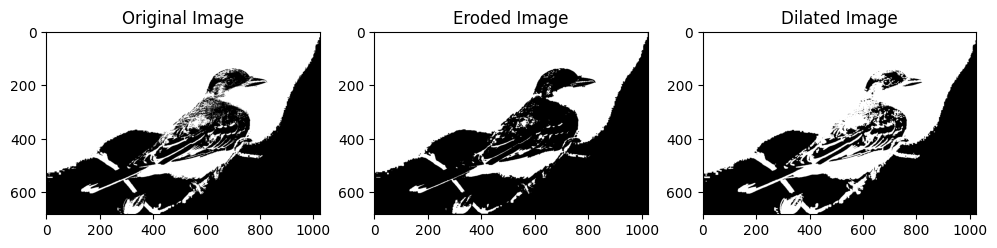

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

# Create a simple 10x10 binary image with a filled square
# image = np.zeros((10, 10), dtype=np.uint8)
# image[2:8, 2:8] = 1  # Fill a square area in the center

# Read the image and convert to grayscale
image_file = 'bird.jpg'
image = imread(image_file)
if image.ndim == 3:
    image = rgb2gray(image)  # Convert RGB to grayscale if needed

# Convert grayscale to binary (thresholding)
binary_image = image > 0.5  # Adjust threshold as needed

# Convert to binary values (0 and 1) for morphology
binary_image = binary_image.astype(np.uint8)

# Define a 3x3 structuring element (all ones)
kernel = np.ones((3, 3), dtype=np.uint8)

def erode(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_img = np.zeros_like(img)
    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i+k_h, j:j+k_w]
            if np.all(region == kernel):
                eroded_img[i, j] = 1
            else:
                eroded_img[i, j] = 0
    return eroded_img

def dilate(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    dilated_img = np.zeros_like(img)
    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i+k_h, j:j+k_w]
            if np.any(region == kernel):
                dilated_img[i, j] = 1
            else:
                dilated_img[i, j] = 0
    return dilated_img

# Perform erosion and dilation on the synthetic binary image
eroded_image = erode(binary_image, kernel)
dilated_image = dilate(binary_image, kernel)

# Display the original and processed images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.show()


## Translation, Reflection & Complement

We'll demonstrate each operation on an image array and use the `skimage` library for image manipulation. Let's go through each one with code snippets.

### 1. Translation of an Image
Translation involves shifting an image horizontally, vertically, or both. We can use the `scipy.ndimage.shift` function for this.

### 2. Reflection of an Image
Reflection can be done horizontally (left-right) or vertically (top-bottom) using `numpy` operations.

### 3. Complement of an Image
Complementing an image means inverting its pixel values. For a grayscale image, we can achieve this by subtracting pixel values from the maximum (for example, 255 if using 8-bit images).

### Explanation of Each Transformation

1. **Translation**:
   - `translate_image` shifts the image by a specified number of pixels `tx` (horizontal) and `ty` (vertical). The `mode='constant'` and `cval=0` fill any empty space with black pixels (0 value).
  
2. **Reflection**:
   - `reflect_image` uses `np.fliplr` for horizontal reflection (left-right flip) and `np.flipud` for vertical reflection (top-bottom flip).

3. **Complement**:
   - `complement_image` inverts pixel values using `util.invert`, which works for both grayscale and binary images. For an 8-bit grayscale, black (0) becomes white (255), and vice versa.

This code will display each transformation next to the original image for comparison. You can replace `sample_image.jpg` with your own image file path to test it.

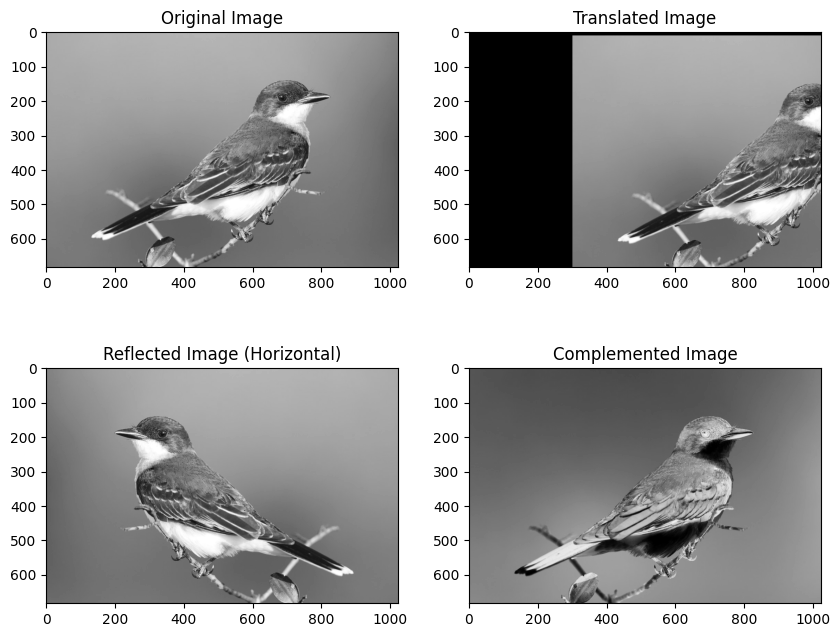

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util
from scipy.ndimage import shift

# Load an example image
image = io.imread('bird.jpg')  # Replace with your file path
if image.ndim == 3:  # Convert to grayscale if it's RGB
    image = color.rgb2gray(image)
    
# Convert grayscale to binary (thresholding)
binary_image = image > 0.5  # Adjust threshold as needed

# Convert to binary values (0 and 1) for morphology
binary_image = binary_image.astype(np.uint8)

# 1. Translation
def translate_image(image, tx, ty):
    """Translate the image by tx pixels horizontally and ty pixels vertically."""
    return shift(image, shift=(ty, tx), mode='constant', cval=0)

# 2. Reflection
def reflect_image(image, axis='horizontal'):
    """Reflect the image horizontally or vertically."""
    if axis == 'horizontal':
        return np.fliplr(image)  # Left-right reflection
    elif axis == 'vertical':
        return np.flipud(image)  # Top-bottom reflection
    else:
        raise ValueError("Axis must be 'horizontal' or 'vertical'.")

# 3. Complement
def complement_image(image):
    """Complement the image by inverting pixel values."""
    # Assuming 8-bit grayscale image with values from 0 to 1
    return util.invert(image)

# Perform transformations
translated_image = translate_image(image, tx=20, ty=10)
reflected_image_horizontal = reflect_image(image, axis='horizontal')
reflected_image_vertical = reflect_image(image, axis='vertical')
complemented_image = complement_image(image)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Translated Image")
plt.imshow(translated_image, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Reflected Image (Horizontal)")
plt.imshow(reflected_image_horizontal, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Complemented Image")
plt.imshow(complemented_image, cmap='gray')

plt.show()


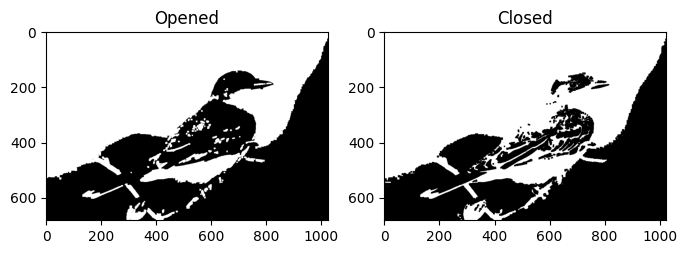

In [9]:
# Apply Opening
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply Closing
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Opened")
plt.imshow(opened_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closed")
plt.imshow(closed_image, cmap='gray')
plt.show()

## Series of Morphological Operations

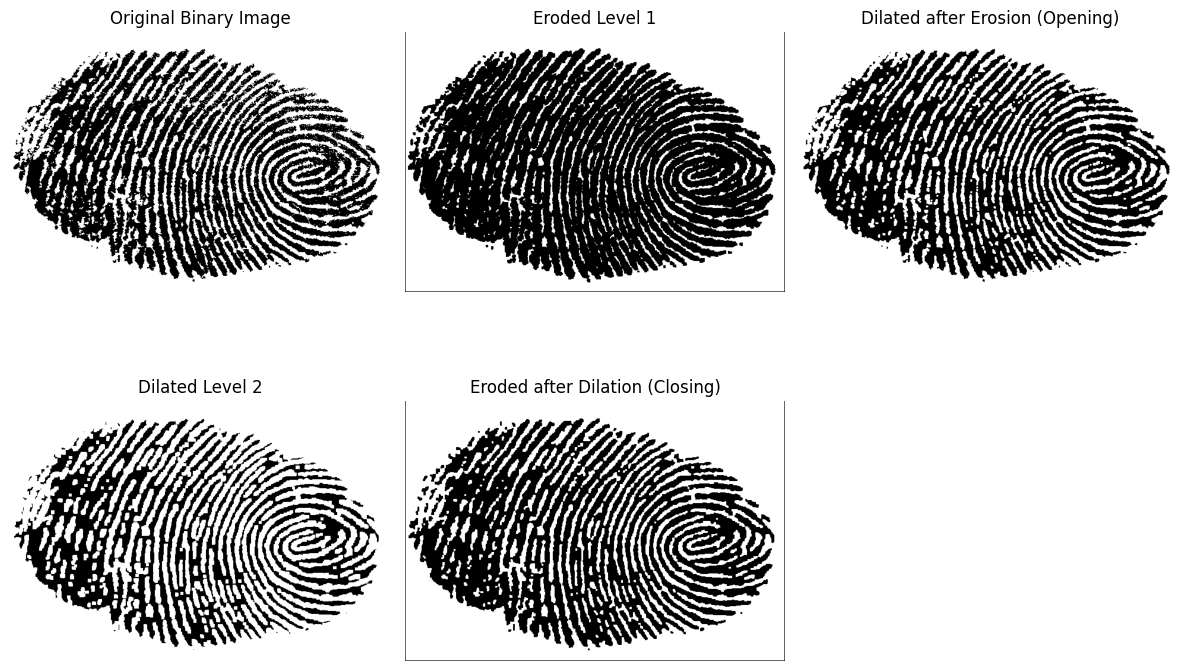

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.ndimage import binary_erosion, binary_dilation

# Load an example image and convert to grayscale
image = io.imread('fingerprint.jpg')  # Replace with your own file path
if image.ndim == 3:  # If RGB, convert to grayscale
    image = color.rgb2gray(image)

# Convert grayscale to binary (thresholding)
binary_image = image > 0.5  # Adjust threshold as needed
binary_image = binary_image.astype(np.uint8)

# Define a 3x3 structuring element (all ones)
kernel = np.ones((3, 3), dtype=np.uint8)

# Perform transformations step-by-step
# Erosion followed by dilation (Opening)
eroded_image_1 = binary_erosion(binary_image, structure=kernel).astype(np.uint8)
dilated_image_1 = binary_dilation(eroded_image_1, structure=kernel).astype(np.uint8)

# Dilation followed by erosion (Closing)
dilated_image_2 = binary_dilation(dilated_image_1, structure=kernel).astype(np.uint8)
eroded_image_2 = binary_erosion(dilated_image_2, structure=kernel).astype(np.uint8)

# Display the series of transformations
plt.figure(figsize=(12, 8))

# Original Binary Image
plt.subplot(2, 3, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

# Eroded Image - Level 1
plt.subplot(2, 3, 2)
plt.title("Eroded Level 1")
plt.imshow(eroded_image_1, cmap='gray')
plt.axis('off')

# Dilated Image - After Erosion (Opening)
plt.subplot(2, 3, 3)
plt.title("Dilated after Erosion (Opening)")
plt.imshow(dilated_image_1, cmap='gray')
plt.axis('off')

# Dilated Image - Level 2
plt.subplot(2, 3, 4)
plt.title("Dilated Level 2")
plt.imshow(dilated_image_2, cmap='gray')
plt.axis('off')

# Eroded Image - After Dilation (Closing)
plt.subplot(2, 3, 5)
plt.title("Eroded after Dilation (Closing)")
plt.imshow(eroded_image_2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Boundary Extraction (Raw)

Simply Subtract `Erode` image from `Original` image

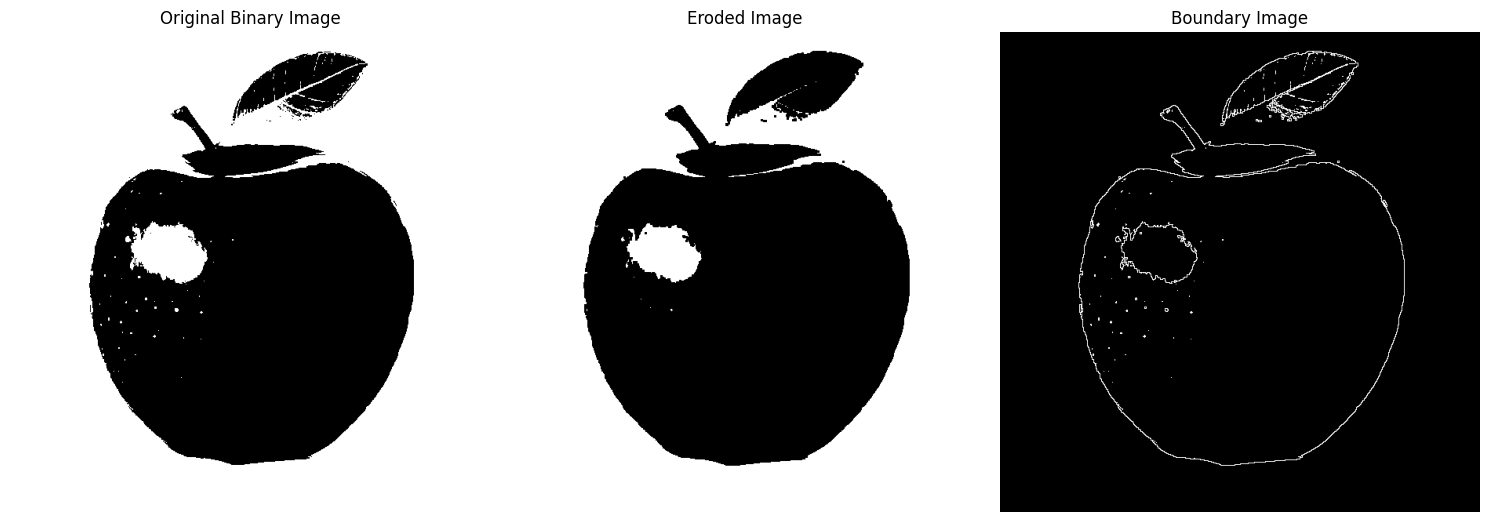

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load a binary image
image = io.imread('apple.jpg')  # Replace with your image path
if image.ndim == 3:  # Convert to grayscale if it's RGB
    image = color.rgb2gray(image)

# Threshold to convert the grayscale image to binary
binary_image = (image > 0.5).astype(np.uint8)  # Convert to binary (0 and 1)

# Define a simple 3x3 structuring element for erosion
kernel = np.ones((3, 3), dtype=np.uint8)

# Erosion function
def erode(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad the image to handle borders
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_img = np.zeros_like(img)

    # Perform erosion
    for i in range(img_h):
        for j in range(img_w):
            # Extract the region of interest
            region = padded_img[i:i + k_h, j:j + k_w]
            # Apply erosion (if all values under the kernel are 1, set to 1)
            eroded_img[i, j] = np.min(region * kernel)

    return eroded_img

# Perform erosion
eroded_image = cv2.erode(binary_image, kernel)

# Boundary extraction: subtract the eroded image from the original binary image
boundary_image = binary_image - eroded_image

# Display the original, eroded, and boundary images
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Boundary Image")
plt.imshow(boundary_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Region Filling (Raw)

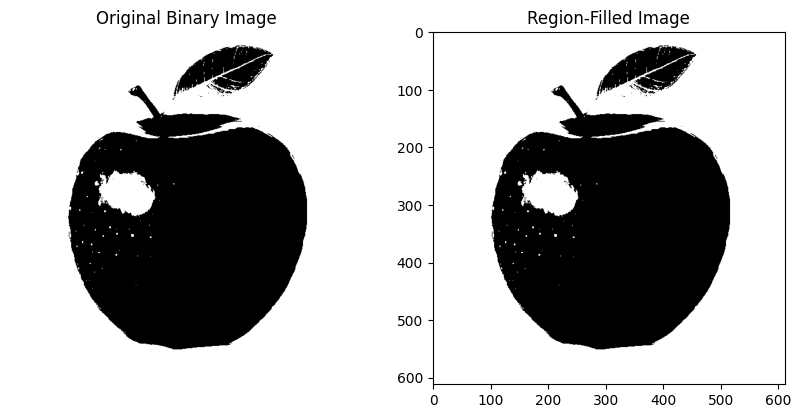

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load and threshold the image
image = io.imread('apple.jpg')  # Replace with your image file path
if image.ndim == 3:
    image = color.rgb2gray(image)

binary_image = (image > 0.5).astype(np.uint8)  # Convert to binary

# Seed point for filling (e.g., inside a closed region)
seed = (250, 200)  # Change to a point inside your desired fill region

# Create an empty image for the filled region
filled_image = np.zeros_like(binary_image)
filled_image[seed] = 1

# Define structuring element for dilation
kernel = np.ones((5, 5), dtype=np.uint8)

# Iterative region filling
def dilate(img, kernel):
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_img = np.zeros_like(img)
    for i in range(img_h):
        for j in range(img_w):
            region = padded_img[i:i + k_h, j:j + k_w]
            dilated_img[i, j] = np.max(region * kernel)
    return dilated_img

while True:
    new_filled_image = dilate(filled_image, kernel) & ~binary_image
    if np.array_equal(new_filled_image, filled_image):
        break
    filled_image = new_filled_image

# Combine the filled region with the original boundary
output_image = binary_image | filled_image

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region-Filled Image")
plt.imshow(output_image, cmap='gray')
# plt.axis('off')

plt.show()


### [Learn OpenCV](https://learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/)

In [ ]:
import cv2
import numpy as np
 
# Read image
im_in = cv2.imread("apple.jpg", cv2.IMREAD_GRAYSCALE)
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV)
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
cv2.imshow("Thresholded Image", im_th)
cv2.imshow("Floodfilled Image", im_floodfill)
cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
cv2.imshow("Foreground", im_out)
cv2.waitKey(0)